In [18]:
import keras 
from keras.datasets import cifar10
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils

In [15]:
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 257s 2us/step


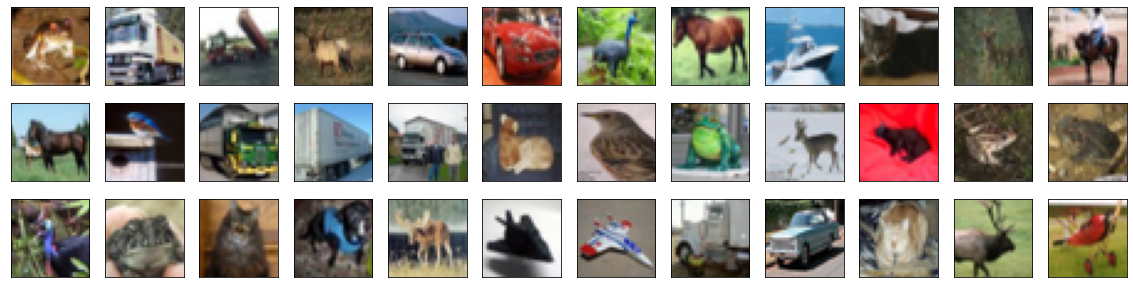

In [19]:
fig = plt.figure(figsize = (20,5))
for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [20]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [25]:
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [26]:
# break training set into training and validation sets
(x_train, x_valid) = x_train[6000:], x_train[:6000]
(y_train, y_valid) = y_train[6000:], y_train[:6000]

In [27]:
x_train.shape, y_train.shape

((38000, 32, 32, 3), (38000, 10))

In [28]:
x_valid.shape, y_valid.shape

((6000, 32, 32, 3), (6000, 10))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [30]:
model = Sequential()
model.add(Flatten(input_shape= x_train.shape[1:]))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
______________________________________________

In [32]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [35]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=256, epochs=20,
           validation_data=(x_valid, y_valid), 
           callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/20
149/149 - 2s - loss: 2.3518 - accuracy: 0.1722 - val_loss: 2.0521 - val_accuracy: 0.2850

Epoch 00001: val_loss improved from inf to 2.05207, saving model to MLP.weights.best.hdf5
Epoch 2/20
149/149 - 1s - loss: 2.0771 - accuracy: 0.2315 - val_loss: 2.0015 - val_accuracy: 0.2548

Epoch 00002: val_loss improved from 2.05207 to 2.00149, saving model to MLP.weights.best.hdf5
Epoch 3/20
149/149 - 1s - loss: 2.0051 - accuracy: 0.2616 - val_loss: 1.9420 - val_accuracy: 0.3260

Epoch 00003: val_loss improved from 2.00149 to 1.94204, saving model to MLP.weights.best.hdf5
Epoch 4/20
149/149 - 1s - loss: 1.9559 - accuracy: 0.2860 - val_loss: 1.8806 - val_accuracy: 0.3407

Epoch 00004: val_loss improved from 1.94204 to 1.88064, saving model to MLP.weights.best.hdf5
Epoch 5/20
149/149 - 1s - loss: 1.9253 - accuracy: 0.2950 - val_loss: 1.9509 - val_accuracy: 0.2758

Epoch 00005: val_loss did not improve from 1.88064
Epoch 6/20
149/149 - 1s - loss: 1.9043 - accuracy: 0.3095 - val_loss: 1.

In [36]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

In [37]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.4138000011444092
